In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 21.6MB/s]
100% 149M/149M [00:07<00:00, 19.9MB/s]


In [6]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)


  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class':classes
  })

  return df

In [7]:
tr_df = get_class_paths("/content/Training")

In [8]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [9]:
ts_df = get_class_paths("/content/Testing")

In [10]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


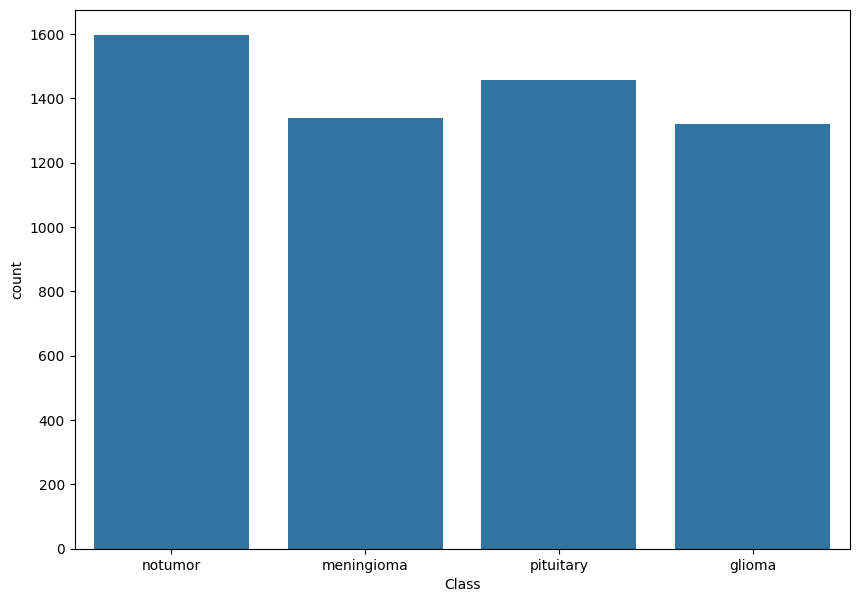

In [11]:
plt.figure(figsize =[10,7])
ax = sns.countplot(data = tr_df, x=tr_df['Class'])

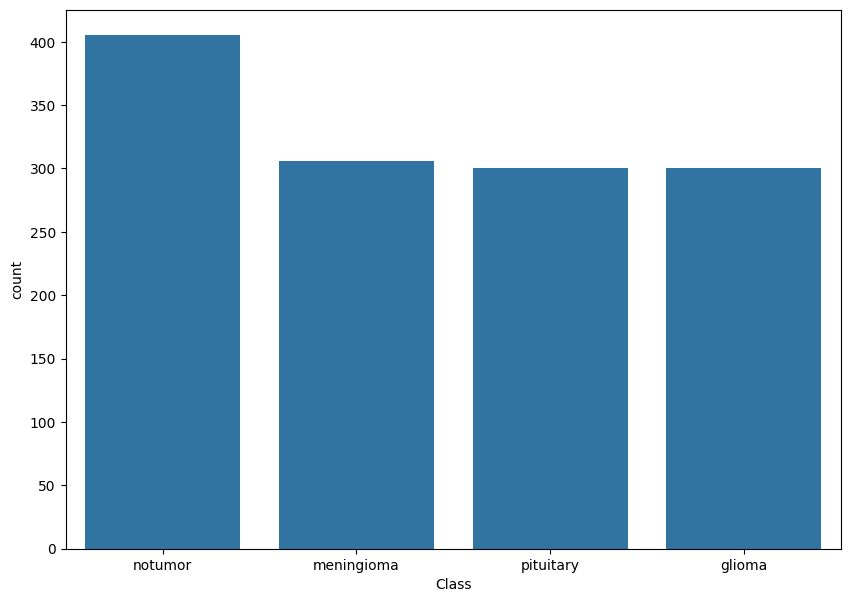

In [12]:
plt.figure(figsize =[10,7])
ax = sns.countplot(data = ts_df, x=ts_df['Class'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [15]:
ts_df

,Class Path,Class
1017,/content/Testing/glioma/Te-gl_0287.jpg,glioma
810,/content/Testing/pituitary/Te-pi_0245.jpg,pituitary
421,/content/Testing/meningioma/Te-me_0259.jpg,meningioma
1137,/content/Testing/glioma/Te-gl_0029.jpg,glioma
1136,/content/Testing/glioma/Te-gl_0144.jpg,glioma
...,...,...
710,/content/Testing/meningioma/Te-me_0200.jpg,meningioma
887,/content/Testing/pituitary/Te-pi_0047.jpg,pituitary
1280,/content/Testing/glioma/Te-gl_0185.jpg,glioma
1038,/content/Testing/glioma/Te-gl_0036.jpg,glioma


In [16]:
valid_df

,Class Path,Class
557,/content/Testing/meningioma/Te-me_0261.jpg,meningioma
417,/content/Testing/meningioma/Te-me_0158.jpg,meningioma
635,/content/Testing/meningioma/Te-me_0072.jpg,meningioma
775,/content/Testing/pituitary/Te-pi_0102.jpg,pituitary
218,/content/Testing/notumor/Te-no_0103.jpg,notumor
...,...,...
1282,/content/Testing/glioma/Te-gl_0278.jpg,glioma
572,/content/Testing/meningioma/Te-me_0288.jpg,meningioma
983,/content/Testing/pituitary/Te-pi_0209.jpg,pituitary
271,/content/Testing/notumor/Te-no_0023.jpg,notumor


In [17]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale= 1/255, brightness_range=(0.0, 1.2))

ts_gen = ImageDataGenerator(rescale = 1/255)


In [18]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                             x_col = 'Class Path',
                                             y_col = 'Class',
                                             batch_size=batch_size,
                                             target_size = img_size)

Found 5712 validated image filenames belonging to 4 classes.


In [19]:
valid_gen = image_generator.flow_from_dataframe(valid_df,
                                             x_col = 'Class Path',
                                             y_col = 'Class',
                                             batch_size=batch_size,
                                             target_size = img_size)

ts_gen = image_generator.flow_from_dataframe(ts_df,
                                             x_col = 'Class Path',
                                             y_col = 'Class',
                                             batch_size=16,
                                             target_size = img_size,
                                             shuffle = False)

Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


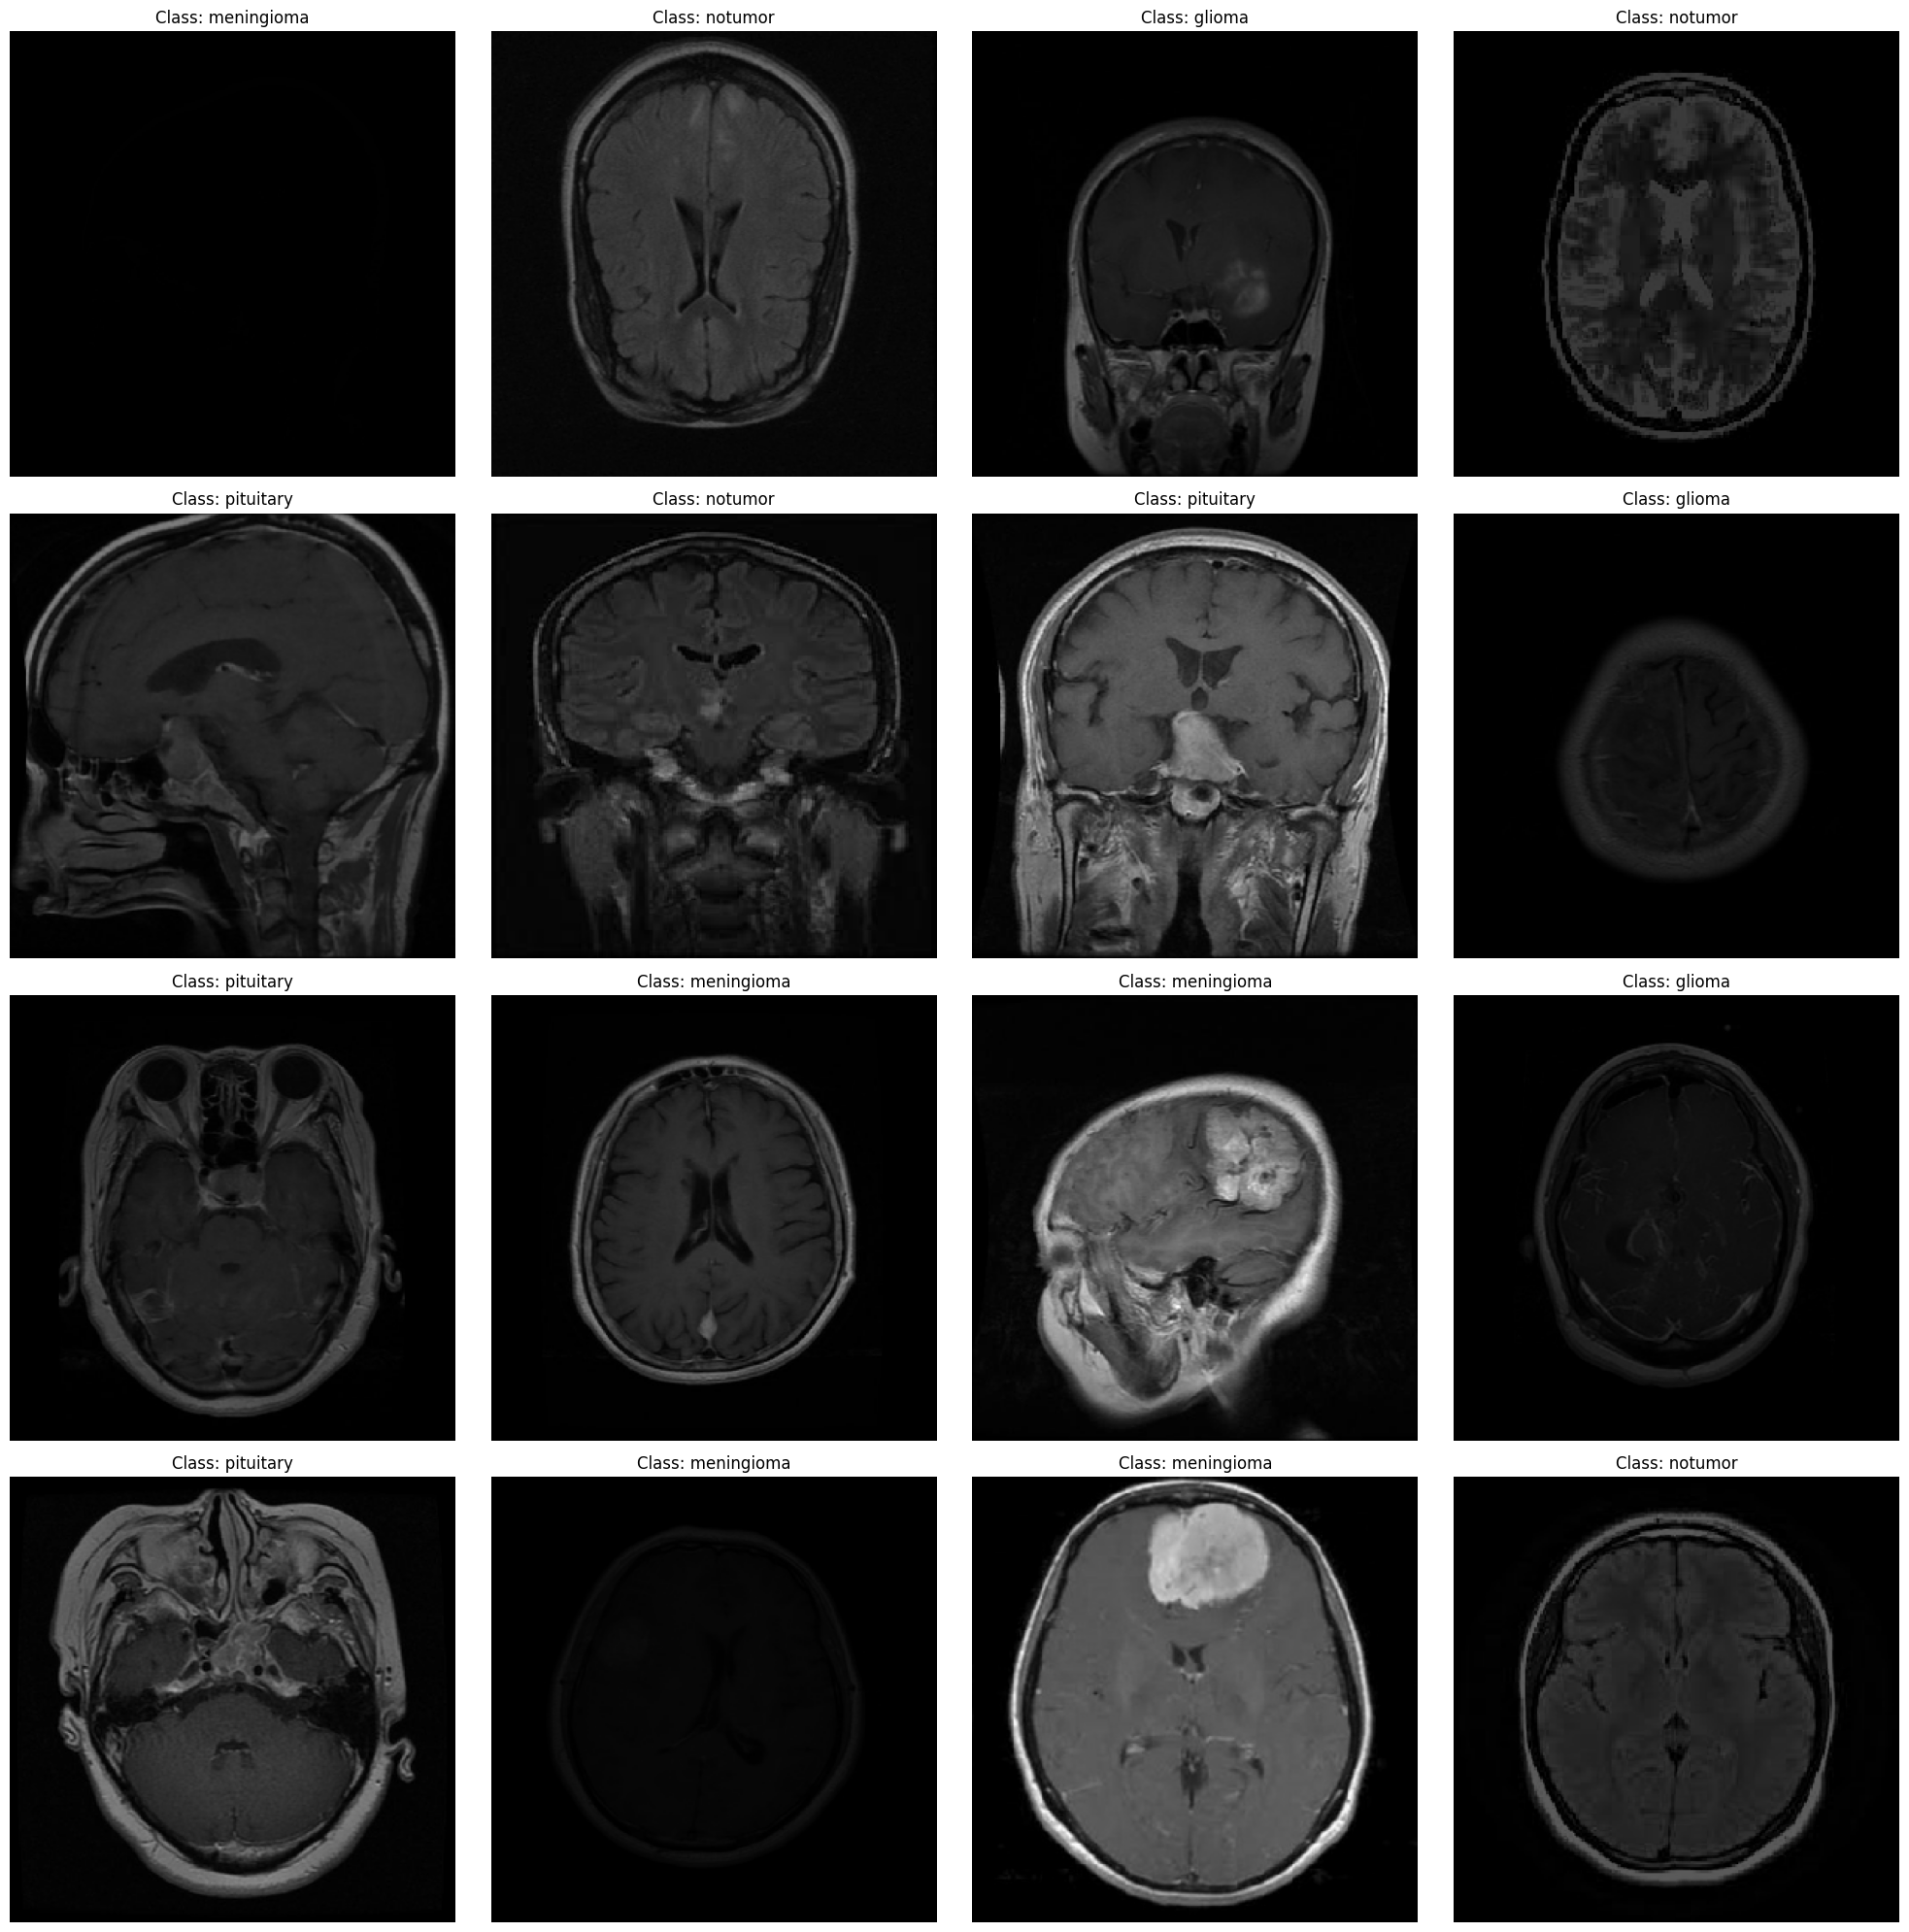

In [20]:
plt.figure(figsize=[20,20])
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights= "imagenet",
                                            input_shape = img_shape,
                                            pooling= "max")

model = Sequential(
    [
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation = 'relu'),
        Dropout(rate=0.25),
        Dense(4, activation= "softmax")
    ]
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
model.compile(Adamax(learning_rate = 0.001),
              loss= 'categorical_crossentropy',
              metrics = ['accuracy',
                         Precision(),
                         Recall()])

In [23]:
hist = model.fit(tr_gen, epochs=5, validation_data = valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.6845 - loss: 0.8347 - precision: 0.7937 - recall: 0.5382 - val_accuracy: 0.9160 - val_loss: 0.2438 - val_precision: 0.9363 - val_recall: 0.8977
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 210s 835ms/step - accuracy: 0.9591 - loss: 0.1210 - precision: 0.9667 - recall: 0.9530 - val_accuracy: 0.9527 - val_loss: 0.1225 - val_precision: 0.9583 - val_recall: 0.9466
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 831ms/step - accuracy: 0.9804 - loss: 0.0556 - precision: 0.9857 - recall: 0.9773 - val_accuracy: 0.9435 - val_loss: 0.1478 - val_precision: 0.9566 - val_recall: 0.9420
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 834ms/step - accuracy: 0.9868 - loss: 0.0388 - precision: 0.9894 - recall: 0.9838 - val_accuracy: 0.9588 - val_loss: 0.1520 - val_precision: 0.9616 - val_recall: 0.9557
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 207s 862ms/step - accuracy: 0.9872 - loss: 0.0336 - precision: 0.9939 - recall: 0.9839 - val_accuracy: 0.9847 - val_loss: 

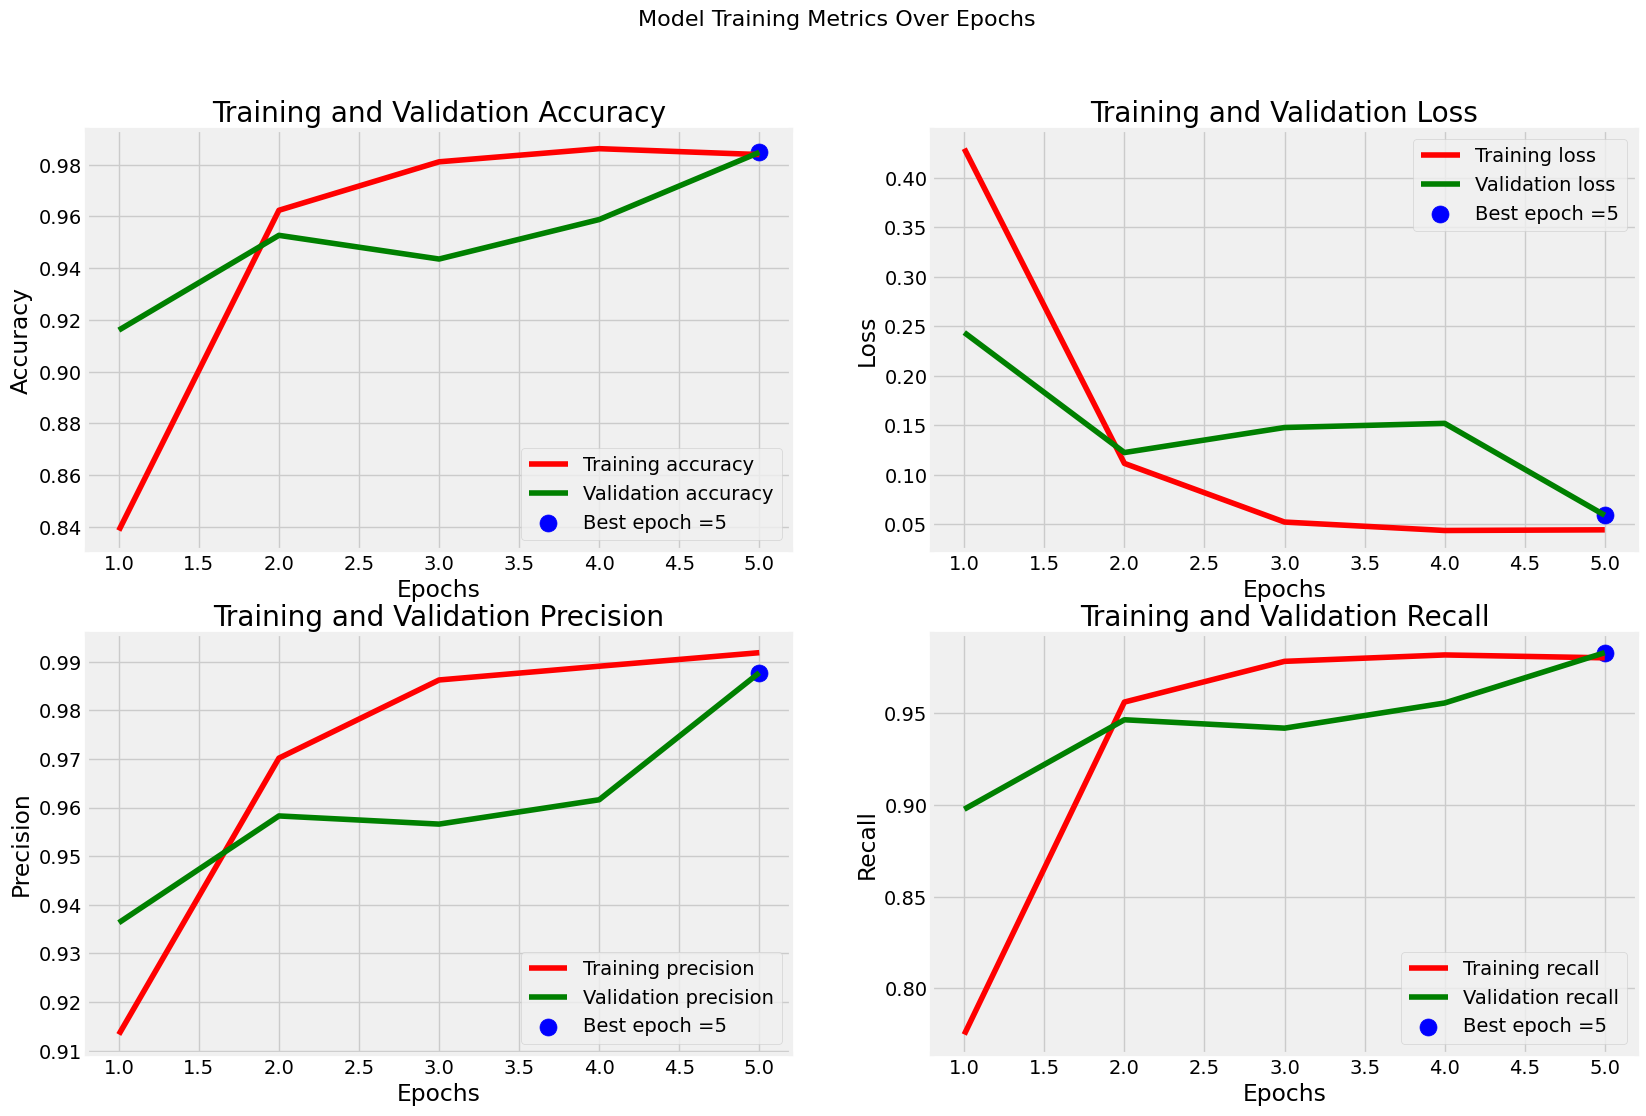

In [24]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs={}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m]= idx+1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize = (20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric])+1)

  plt.plot(epochs, tr_metrics[metric], 'r', label =f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label = f'Best epoch ={best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [25]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]*100:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]*100:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]*100:.4f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 249ms/step - accuracy: 0.9875 - loss: 0.0357 - precision: 0.9915 - recall: 0.9858
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9552 - loss: 0.1034 - precision: 0.9625 - recall: 0.9497
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8750 - loss: 0.3250 - precision: 0.8750 - recall: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9704 - loss: 0.0879 - precision: 0.9769 - recall: 0.9628
Train Accuracy: 98.83%
Train Loss: 3.6213%


Validation Accuracy: 97.10%
Validation Loss: 8.2814%


Test Accuracy: 97.71%
Test Loss: 7.2631%


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step


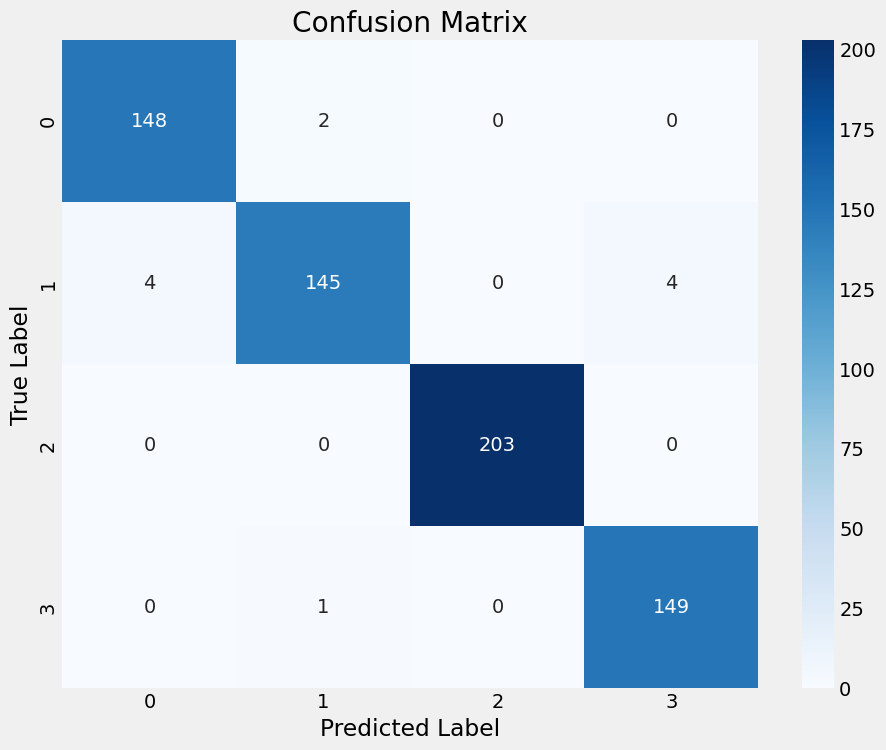

In [26]:
preds= model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'gloima',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from PIL import Image

def predict(img_path:str) -> None:
  labels = list(class_dict.keys())

  plt.figure(figsize=(6,8))

  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis =0)

  predictions = model.predict(img_array)
  probabilities= list(predictions[0])

  predicted_class_idx= np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2, 1, 2)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  ax=plt.gca()
  ax.bar_label(bars, fmt="4.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


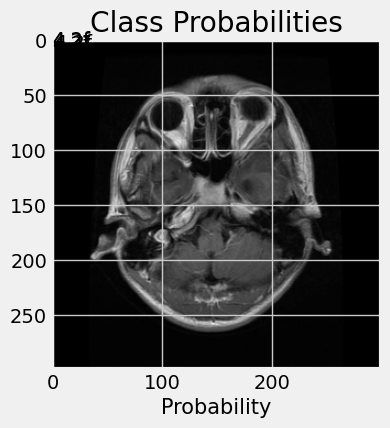


Predicted tumor type: no_tumor


In [28]:
predict('/content/Testing/glioma/Te-glTr_0003.jpg')

In [29]:
model.save_weights("xception_model.weights.h5")

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [35]:
# reduced default image size to 224 x 224
img_size = (224,224)


# rescale all pixels from 0-255 to 0-1
# assign a random brightness from 0.8-1.2 (ONLY FOR TRAINING SET)
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))

# rescale all pixels from 0-255 to 0-1
ts_image_generator = ImageDataGenerator(rescale=1./255)

# standardized training set
# reduced batch_size to 16
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size)

# standardized validation set
# reduced batch_size to 316
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size)

# standardized test set
# batch_size = 16
# no shuffling to maintain order of test set
ts_gen = ts_image_generator.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [36]:
# Create a Sequential model
cnn_model = Sequential()

## Convolutional Block 1

# conv layer with 512 filters
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(224,224, 3)))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))

## Convolutional Block 2

# conv layer with 256 filters
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))
# drop 25% of units
cnn_model.add(Dropout(0.25))

## Convolutional Block 3

# conv layer with 128 filters
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))
# drop 25% of units
cnn_model.add(Dropout(0.25))

## Convolutional Block 4

# conv layer with 64 filters
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))

## Fully connected layers

# Flatten Layer to 1D
cnn_model.add(Flatten())


# Dense layer 1
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# drop 35% of units
cnn_model.add(Dropout(0.35))
# Output dense layer
cnn_model.add(Dense(4, activation='softmax'))

# compile model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# show model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,555,844 (21.19 MB)

 Trainable params: 5,553,028 (21.18 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [38]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)


cnn_hist = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen, callbacks=[early_stopping, lr_scheduler])

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 184s 514ms/step - accuracy: 0.6251 - loss: 6.5056 - precision: 0.6557 - recall: 0.5761 - val_accuracy: 0.2473 - val_loss: 6.5506 - val_precision: 0.2439 - val_recall: 0.2427 - learning_rate: 0.0010
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 175s 439ms/step - accuracy: 0.7950 - loss: 3.3252 - precision: 0.8196 - recall: 0.7626 - val_accuracy: 0.7389 - val_loss: 2.7287 - val_precision: 0.7611 - val_recall: 0.7053 - learning_rate: 0.0010
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 202s 439ms/step - accuracy: 0.8524 - loss: 2.2691 - precision: 0.8708 - recall: 0.8315 - val_accuracy: 0.7786 - val_loss: 1.8548 - val_precision: 0.7942 - val_recall: 0.7481 - learning_rate: 0.0010
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 202s 439ms/step - accuracy: 0.8794 - loss: 1.5726 - precision: 0.8926 - recall: 0.8628 - val_accuracy: 0.8473 - val_loss: 1.2793 - val_precision: 0.8545 - val_recall: 0.8427 - learning_rate: 0.0010
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 202s 439ms/st

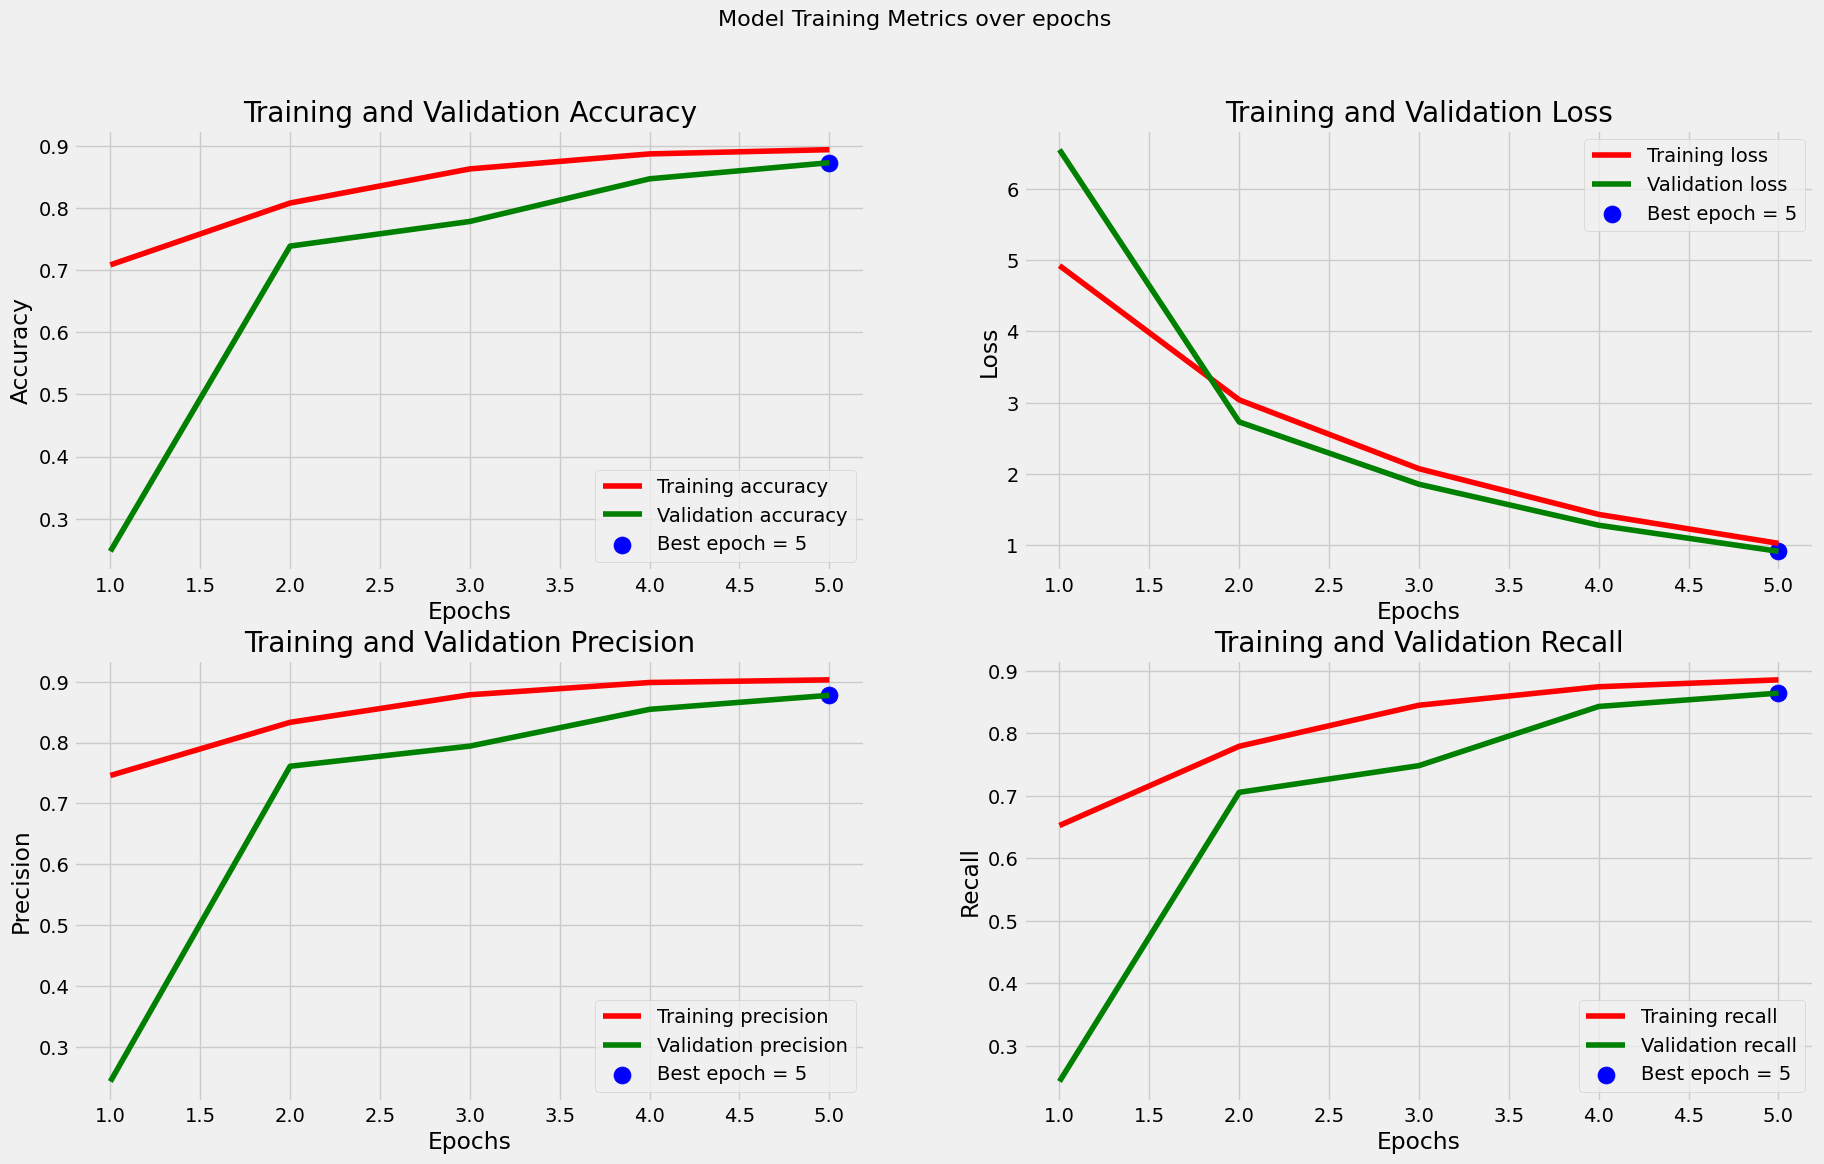

In [39]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: cnn_hist.history[m] for m in metrics}
val_metrics = {m: cnn_hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values on validation set
best_epochs = {}
best_values = {}

for m in metrics:
  # less is better when it comes to loss
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  # more is better for other metrics
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metricies
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(val_metrics[metric])+ 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training Metrics over epochs", fontsize=16)
plt.show()

In [40]:
# evaluate performance on training set
cnn_train_score = cnn_model.evaluate(tr_gen, verbose=1)
# evaluate performance on validation set
cnn_valid_score = cnn_model.evaluate(valid_gen, verbose=1)
# evaluate performance on test set
cnn_test_score = cnn_model.evaluate(ts_gen, verbose=1)

357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.9339 - loss: 0.7879 - precision: 0.9393 - recall: 0.9310
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8656 - loss: 0.8887 - precision: 0.8756 - recall: 0.8650
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8750 - loss: 0.8770 - precision: 0.9286 - recall: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8945 - loss: 0.8688 - precision: 0.9042 - recall: 0.8839


In [41]:
print(f'Train Accuracy: {cnn_train_score[1]*100:.2f}%')
print(f'Train Loss: {cnn_train_score[0]:.4f}')

print(f'\nValid Accuracy: {cnn_valid_score[1]*100:.2f}%')
print(f'Valid Accuracy: {cnn_valid_score[0]:.4f}')

print(f'\nTest Accuracy: {cnn_test_score[1]*100:.2f}%')
print(f'Test Loss: {cnn_test_score[0]:.4f}')

Train Accuracy: 93.22%
Train Loss: 0.7937

Valid Accuracy: 87.02%
Valid Accuracy: 0.9026

Test Accuracy: 88.41%
Test Loss: 0.8785


In [42]:
# prediction probabilities on test set
preds = cnn_model.predict(ts_gen)

# extracts highest prediction out of predictions
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step


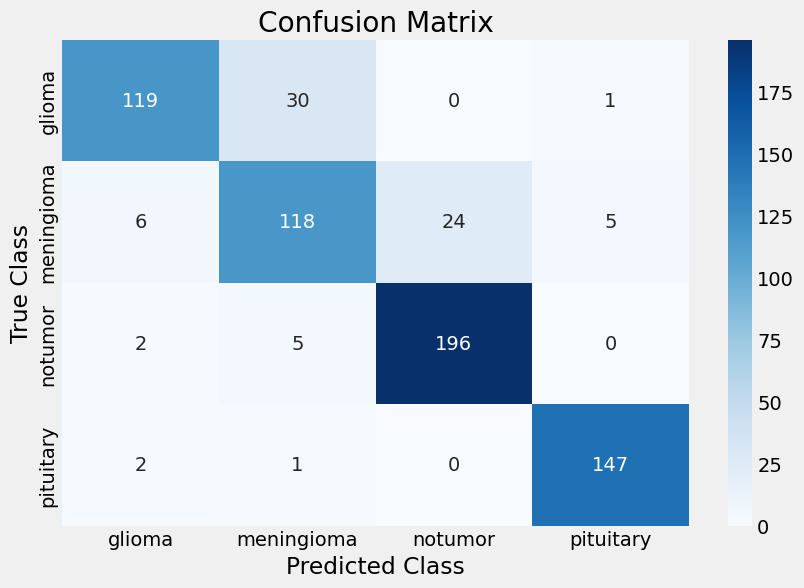

In [43]:
# Display Confusion Matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
# map predictions to labels
labels = list(class_dict.values())
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=90)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [44]:
clr = classification_report(ts_gen.classes, y_pred, target_names=labels)
print(clr)

              precision    recall  f1-score   support

      glioma       0.92      0.79      0.85       150
  meningioma       0.77      0.77      0.77       153
     notumor       0.89      0.97      0.93       203
   pituitary       0.96      0.98      0.97       150

    accuracy                           0.88       656
   macro avg       0.89      0.88      0.88       656
weighted avg       0.89      0.88      0.88       656



In [45]:
from PIL import Image

def cnn_predict(img_path:str) -> None:
  # Get class labels
  labels = list(class_dict.values())

  # Create figure
  plt.figure(figsize=(12,6))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((224,224))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = cnn_model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted classes
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(1, 2, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(1, 2, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


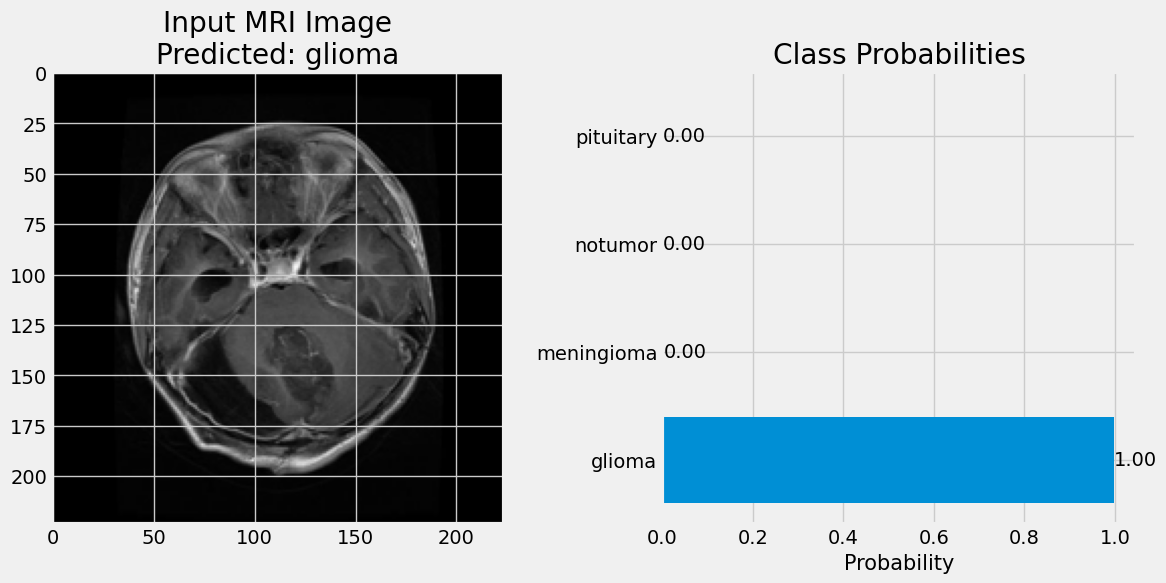


Predicted tumor type: glioma


In [50]:
cnn_predict('/content/Testing/glioma/Te-glTr_0000.jpg')

In [51]:
cnn_model.save('cnn_model2.h5')